# Glycosyltransferases in RBCs

## Imports

In [1]:
import pandas as pd
import urllib.request
import gzip
from pathlib import Path

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (11.0, 7.0)

In [3]:
DATA = Path("../data/")
RESULTS = Path("../results/")

## Data download

Data from 

> Merryweather-Clarke AT, Atzberger A, Soneji S, Gray N et al. Global gene expression analysis of human erythroid progenitors. Blood 2011 Mar 31;117(13):e96-108. PMID: 21270440

In [4]:
merryweather_url = "ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE22nnn/GSE22552/matrix/GSE22552_series_matrix.txt.gz"
merryweather  = pd.read_table(merryweather_url, compression="gzip", comment="!")

In [5]:
merryweather.head()

ID_REF  GSM559689  GSM559690  GSM559691  GSM559692  GSM559693  \
0  1007_s_at   4.946777   4.728418   4.738051   4.762729   4.549447   
1    1053_at   8.207308   8.695805   8.383330   8.049325   8.751171   
2     117_at   6.311369   5.249919   5.953954   5.532214   5.746198   
3     121_at   7.159099   7.062484   7.329124   7.294014   7.006325   
4  1255_g_at   3.821799   3.603829   3.691750   3.791226   3.654054   

   GSM559694  GSM559695  GSM559696  GSM559697  GSM559698  GSM559699  \
0   4.835533   4.709747   4.715527   5.049346   5.631210   5.379607   
1   8.381886   7.992828   7.998183   7.401185   5.444929   5.151547   
2   6.212243   6.870430   7.032106   7.295045   7.667298   7.784505   
3   7.283475   7.156998   7.201767   7.397696   7.543862   7.869274   
4   3.681459   4.896534   4.008463   4.508532   4.946233   3.765626   

   GSM559700  GSM559701  GSM559702  GSM559703  GSM559704  
0   5.397816   5.104329   4.912640   5.076418   5.181067  
1   5.207811   7.819818   7.823374   7.262280   6.317741  
2   8.278446   5.672696   5.921971   6.699486   6.905009  
3   7.897521   7.164850   7.083180   7.217689   7.474255  
4   4.096830   3.531186   3.668187   4.190600   3.905629

## Data cleaning

Fix column names with data from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE22552. The samples included are as follows:

> PBMC-derived erythroblasts grown in vitro were harvested at the CFU-E, Pro-E, Int-E and Late-E stages and FACS sorted based on expression of cell surface markers. RNA was extracted from those populations which met rigorous specifications of time cultured in the presence of erythropoietin, morphology and CD36, CD71 and CD235a expression. For each stage, 3 chips were hybridised, each representing a pool of 4 different samples. In addition to these 12 chips, one chip representing a pool of RNA extracted from unsorted cells at each stages was also hybridised.
    
So we don't want the unsorted samples (prefixed Uns)

In [6]:
column_names_text = """GSM559689 	CFU-E_1
GSM559690 	CFU-E_2
GSM559691 	CFU-E_3
GSM559692 	Pro-E_1
GSM559693 	Pro-E_2
GSM559694 	Pro-E_3
GSM559695 	Int-E_1
GSM559696 	Int-E_2
GSM559697 	Int-E_3
GSM559698 	Late-E_1
GSM559699 	Late-E_2
GSM559700 	Late-E_3
GSM559701 	Uns_CFU-E
GSM559702 	Uns_Pro-E
GSM559703 	Uns_Int-E
GSM559704 	Uns_Late-E"""

columns = {sample.split()[0]: sample.split()[1] for sample in column_names_text.splitlines()}

In [7]:
columns

{'GSM559689': 'CFU-E_1',
 'GSM559690': 'CFU-E_2',
 'GSM559691': 'CFU-E_3',
 'GSM559692': 'Pro-E_1',
 'GSM559693': 'Pro-E_2',
 'GSM559694': 'Pro-E_3',
 'GSM559695': 'Int-E_1',
 'GSM559696': 'Int-E_2',
 'GSM559697': 'Int-E_3',
 'GSM559698': 'Late-E_1',
 'GSM559699': 'Late-E_2',
 'GSM559700': 'Late-E_3',
 'GSM559701': 'Uns_CFU-E',
 'GSM559702': 'Uns_Pro-E',
 'GSM559703': 'Uns_Int-E',
 'GSM559704': 'Uns_Late-E'}

Rename the columns.

In [8]:
merryweather = merryweather.rename(columns=columns)

Filter out the columns we want, and merge the three replicates by taking the mean of the expression.

In [9]:
prefixes = ["CFU-E", "Pro-E", "Int-E", "Late-E"]

In [10]:
for prefix in prefixes:
    merryweather[prefix + "_mean"] = merryweather.filter(like=prefix).mean(axis=1)

Check the data.

In [11]:
merryweather.head()

ID_REF   CFU-E_1   CFU-E_2   CFU-E_3   Pro-E_1   Pro-E_2   Pro-E_3  \
0  1007_s_at  4.946777  4.728418  4.738051  4.762729  4.549447  4.835533   
1    1053_at  8.207308  8.695805  8.383330  8.049325  8.751171  8.381886   
2     117_at  6.311369  5.249919  5.953954  5.532214  5.746198  6.212243   
3     121_at  7.159099  7.062484  7.329124  7.294014  7.006325  7.283475   
4  1255_g_at  3.821799  3.603829  3.691750  3.791226  3.654054  3.681459   

    Int-E_1   Int-E_2   Int-E_3     ...       Late-E_2  Late-E_3  Uns_CFU-E  \
0  4.709747  4.715527  5.049346     ...       5.379607  5.397816   5.104329   
1  7.992828  7.998183  7.401185     ...       5.151547  5.207811   7.819818   
2  6.870430  7.032106  7.295045     ...       7.784505  8.278446   5.672696   
3  7.156998  7.201767  7.397696     ...       7.869274  7.897521   7.164850   
4  4.896534  4.008463  4.508532     ...       3.765626  4.096830   3.531186   

   Uns_Pro-E  Uns_Int-E  Uns_Late-E  CFU-E_mean  Pro-E_mean  Int-E_mean  \
0   4.912640   5.076418    5.181067    4.879394    4.765087    4.887759   
1   7.823374   7.262280    6.317741    8.276565    8.251439    7.663619   
2   5.921971   6.699486    6.905009    5.796984    5.853156    6.974267   
3   7.083180   7.217689    7.474255    7.178889    7.166749    7.243538   
4   3.668187   4.190600    3.905629    3.662141    3.698731    4.401032   

   Late-E_mean  
0     5.397425  
1     5.530507  
2     7.658814  
3     7.696228  
4     4.178579  

[5 rows x 21 columns]

## Probe annotation

In [12]:
def get_gpl570_annotations() -> pd.DataFrame:
    annot_url = "ftp://ftp.ncbi.nlm.nih.gov/geo/platforms/GPLnnn/GPL570/annot/GPL570.annot.gz"
    with urllib.request.urlopen(annot_url) as annot:
        data = gzip.decompress(annot.read()).decode("utf-8")

    rows = []
    for row in data.splitlines():
        if row[0] in set("^!#"):
            continue
        fields = row.split("\t")
        rows.append(fields[:4])
    gpl570 = pd.DataFrame.from_records(rows[1:])
    gpl570.columns = rows[0]
    return gpl570

gpl570 = get_gpl570_annotations()

In [13]:
def annotate_probes(gsedata, gpldata):
    return gsedata.merge(gpldata, left_on="ID_REF", right_on="ID")

merryweather_annot = annotate_probes(merryweather, gpl570)

In [14]:
merryweather_annot.head()

ID_REF   CFU-E_1   CFU-E_2   CFU-E_3   Pro-E_1   Pro-E_2   Pro-E_3  \
0  1007_s_at  4.946777  4.728418  4.738051  4.762729  4.549447  4.835533   
1    1053_at  8.207308  8.695805  8.383330  8.049325  8.751171  8.381886   
2     117_at  6.311369  5.249919  5.953954  5.532214  5.746198  6.212243   
3     121_at  7.159099  7.062484  7.329124  7.294014  7.006325  7.283475   
4  1255_g_at  3.821799  3.603829  3.691750  3.791226  3.654054  3.681459   

    Int-E_1   Int-E_2   Int-E_3       ...         Uns_Int-E  Uns_Late-E  \
0  4.709747  4.715527  5.049346       ...          5.076418    5.181067   
1  7.992828  7.998183  7.401185       ...          7.262280    6.317741   
2  6.870430  7.032106  7.295045       ...          6.699486    6.905009   
3  7.156998  7.201767  7.397696       ...          7.217689    7.474255   
4  4.896534  4.008463  4.508532       ...          4.190600    3.905629   

   CFU-E_mean  Pro-E_mean  Int-E_mean  Late-E_mean         ID  \
0    4.879394    4.765087    4.887759     5.397425  1007_s_at   
1    8.276565    8.251439    7.663619     5.530507    1053_at   
2    5.796984    5.853156    6.974267     7.658814     117_at   
3    7.178889    7.166749    7.243538     7.696228     121_at   
4    3.662141    3.698731    4.401032     4.178579  1255_g_at   

                                          Gene title     Gene symbol  \
0  microRNA 4640///discoidin domain receptor tyro...  MIR4640///DDR1   
1                     replication factor C subunit 2            RFC2   
2       heat shock protein family A (Hsp70) member 6           HSPA6   
3                                       paired box 8            PAX8   
4                     guanylate cyclase activator 1A          GUCA1A   

           Gene ID  
0  100616237///780  
1             5982  
2             3310  
3             7849  
4             2978  

[5 rows x 25 columns]

## Glycosyltransferases in data

In [15]:
gts = pd.read_table(RESULTS / "glycosyltransferases.txt")

In [16]:
gts_in_merryweather = gts[gts["geneSymbol"].isin(merryweather_annot["Gene symbol"])]

In [17]:
print(f"There are {len(gts)} glycosyltransferases in total. Of these, ",
      f"{len(gts_in_merryweather)} ({len(gts_in_merryweather) / len(gts):.1%})",
      f" are present in the Merryweather et al. data.", sep="")

There are 244 glycosyltransferases in total. Of these, 223 (91.4%) are present in the Merryweather et al. data.


These GTs are in the data

In [18]:
print("\n".join(sorted(gts_in_merryweather["geneSymbol"])))

A4GALT
A4GNT
ABO
AGL
ALG1
ALG10
ALG12
ALG13
ALG14
ALG2
ALG3
ALG5
ALG6
ALG8
ALG9
APRT
ART1
ART3
ART4
ART5
B3GALNT1
B3GALNT2
B3GALT1
B3GALT2
B3GALT4
B3GALT5
B3GALT6
B3GAT1
B3GAT2
B3GAT3
B3GLCT
B3GNT2
B3GNT3
B3GNT4
B3GNT5
B3GNT6
B3GNT7
B3GNT8
B3GNT9
B3GNTL1
B4GALNT1
B4GALNT2
B4GALNT3
B4GALNT4
B4GALT1
B4GALT2
B4GALT3
B4GALT4
B4GALT5
B4GALT6
B4GALT7
B4GAT1
C1GALT1
C1GALT1C1
CD38
CERCAM
CHPF
CHPF2
CHSY1
CHSY3
COLGALT1
COLGALT2
CSGALNACT1
CSGALNACT2
DPM1
DPY19L1
DPY19L2
DPY19L3
DPY19L4
EOGT
EXT1
EXT2
EXTL1
EXTL2
EXTL3
FUT1
FUT10
FUT11
FUT2
FUT3
FUT4
FUT5
FUT6
FUT7
FUT8
FUT9
GALNT1
GALNT10
GALNT11
GALNT12
GALNT13
GALNT14
GALNT15
GALNT16
GALNT18
GALNT2
GALNT3
GALNT5
GALNT6
GALNT7
GALNT8
GALNT9
GALNTL5
GALNTL6
GBE1
GBGT1
GCNT1
GCNT2
GCNT3
GCNT4
GCNT7
GLT1D1
GLT8D1
GLT8D2
GTDC1
GXYLT1
GXYLT2
GYG1
GYG2
GYS1
GYS2
HAS1
HAS2
HAS3
HPRT1
KDELC1
LARGE1
LARGE2
LFNG
MFNG
MGAT1
MGAT2
MGAT3
MGAT4A
MGAT4B
MGAT4C
MGAT5
MGAT5B
MTAP
NAMPT
OGT
PARP1
PARP10
PARP11
PARP12
PARP14
PARP15
PARP16
PARP2
PARP3
PARP4
PAR

These are not in the data.

In [19]:
gts_not_in_merryweather = gts[~gts["geneSymbol"].isin(merryweather_annot["Gene symbol"])]
print(f"{len(gts_not_in_merryweather)} ({len(gts_not_in_merryweather) / len(gts):.1%}) GTs are not in the data")

21 (8.6%) GTs are not in the data


In [20]:
# sanity check
assert len(gts_not_in_merryweather) == len(gts) - len(gts_in_merryweather)

In [21]:
print("\n".join(sorted(gts_not_in_merryweather["geneSymbol"])))

A3GALT2
ALG10B
ALG11
ALG1L
ALG1L2
GALNT17
GALNT4
GLT6D1
ST8SIA6
UGT1A10
UGT1A3
UGT1A4
UGT1A5
UGT1A7
UGT1A8
UGT1A9
UGT2A1
UGT2B10
UGT2B11
UGT2B7
UGT3A2


Save the expression data for glycosyltranferases.

In [22]:
merryweather_gts = merryweather_annot[merryweather_annot["Gene symbol"].isin(gts["geneSymbol"])]

In [23]:
merryweather_gts.head()

ID_REF   CFU-E_1   CFU-E_2   CFU-E_3   Pro-E_1   Pro-E_2   Pro-E_3  \
44   1552304_at  3.612051  5.744082  5.235897  4.309663  5.093327  4.760656   
45   1552306_at  4.432394  6.225844  5.447328  4.582803  5.826000  4.919102   
191  1552524_at  5.787629  5.538624  5.452733  5.767793  5.373152  5.539101   
411  1552833_at  5.451816  4.891001  5.435920  5.053673  4.790924  5.013330   
412  1552834_at  6.784300  6.446160  6.777008  6.356040  6.654875  6.729701   

      Int-E_1   Int-E_2   Int-E_3   ...     Uns_Int-E  Uns_Late-E  CFU-E_mean  \
44   4.458262  4.278771  4.535177   ...      4.265149    3.806288    4.769442   
45   4.572902  4.661163  4.410146   ...      4.495597    4.094941    5.421378   
191  5.550876  5.483090  5.650279   ...      5.559230    5.633744    5.565892   
411  5.144601  5.079655  5.131256   ...      5.063796    5.250900    5.168601   
412  6.653274  6.659809  6.708541   ...      6.766825    6.785688    6.639651   

     Pro-E_mean  Int-E_mean  Late-E_mean          ID  \
44     4.669961    4.384340     3.657504  1552304_at   
45     5.098879    4.534952     3.534573  1552306_at   
191    5.579884    5.560869     5.844593  1552524_at   
411    4.999347    5.104827     5.650752  1552833_at   
412    6.570284    6.697112     6.888908  1552834_at   

                                            Gene title  Gene symbol  Gene ID  
44                ALG10, alpha-1,2-glucosyltransferase        ALG10    84920  
45                ALG10, alpha-1,2-glucosyltransferase        ALG10    84920  
191                           ADP-ribosyltransferase 5         ART5   116969  
411  UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosamin...       B3GNT6   192134  
412  UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosamin...       B3GNT6   192134  

[5 rows x 25 columns]

## Merge probes per celltype and gene

In [24]:
def merge_probes(gsedata, columns):
    "Merge probes by probe and cell type by taking the mean value of all probes"
    data = []
    col_mean_names = [col + "_mean" for col in columns]
    for geneSymbol, group in gsedata.groupby("Gene symbol"):
        rec = {
            "geneSymbol": geneSymbol
        }
        for col_mean_name in col_mean_names:
            rec[col_mean_name] = group[col_mean_name].mean()
        data.append(rec)

    gt_ery_levels = pd.DataFrame(data)
    # reorder
    gt_ery_levels = gt_ery_levels[["geneSymbol"] + col_mean_names]
    return gt_ery_levels

In [25]:
gt_ery_levels = merge_probes(merryweather_gts, prefixes)

We now have a table with gene symbol and the expression per cell type. The three replicates per cell type are averaged, and then these probe replicate means are averaged per gene.

In [26]:
gt_ery_levels.head()

geneSymbol  CFU-E_mean  Pro-E_mean  Int-E_mean  Late-E_mean
0     A4GALT    7.169947    7.584270    7.467496     7.616164
1      A4GNT    4.503931    4.499662    4.421833     4.542107
2        ABO    5.329089    5.258070    5.230035     5.601789
3        AGL    9.372863    9.408986    8.980682     5.296508
4       ALG1    6.883261    6.637652    5.869411     5.716471

In [33]:
gt_ery_levels.to_csv(RESULTS / "merryweather_gt_ery_levels.txt", sep="\t", index=False)

## Expression pattern for known blood group genes

In [28]:
bgs = ['A4GALT', 'ABO', 'B3GALNT1', 'FUT2', 'FUT1', 'GBGT1', 'FUT3', 'GCNT2', 'ART4']

In [29]:
def plot_bggenes(gt_ery_levels, bg_genes, xticklabels, gene_column="geneSymbol"):
    fig, ax = plt.subplots()
    for gene in bg_genes:
        # iloc[0] to convert single-row df to Series
        data = gt_ery_levels[gt_ery_levels[gene_column] == gene][xticklabels].iloc[0].values
        ax.plot(data, label=gene)
    ax.legend()
    
    # yscale="log", 
    ax.set(xticks=range(len(xticklabels)), xticklabels=xticklabels,
           title="Expression of known blood group genes", ylabel="expression")
    return fig

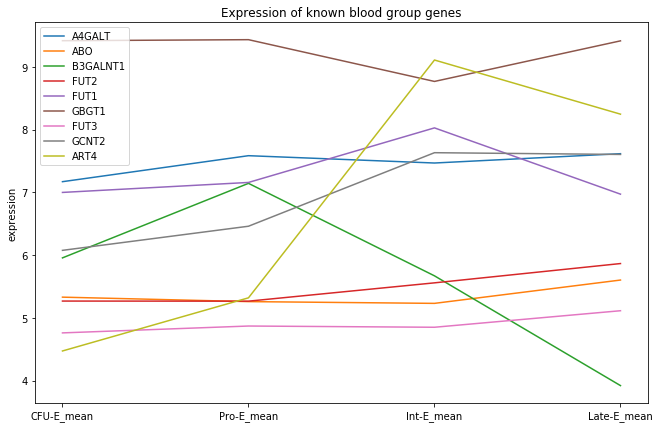

In [30]:
mean_prefixes = [prefix + "_mean" for prefix in prefixes]
bg_plot = plot_bggenes(gt_ery_levels, bgs, mean_prefixes)

Blood group genes in relation to other GTs.

In [31]:
def plot_subset_vs_rest(gt_ery_levels, subset, xticklabels):
    fig, ax = plt.subplots()
    for index, row in gt_ery_levels.iterrows():
        if row["geneSymbol"] in subset:
            continue
        else:
            color = "blue"
        ax.plot(row[xticklabels].values, color=color, alpha=0.7)

    # plot bg genes on top
    for index, row in gt_ery_levels.iterrows():
        if row["geneSymbol"] in subset:
            color = "red"
        else:
            continue
        ax.plot(row[xticklabels].values, color=color)

    ax.set(xticks=range(len(xticklabels)), xticklabels=xticklabels, ylabel="expression",
           title="Expression of all glycosyltransferases"); 
    return fig

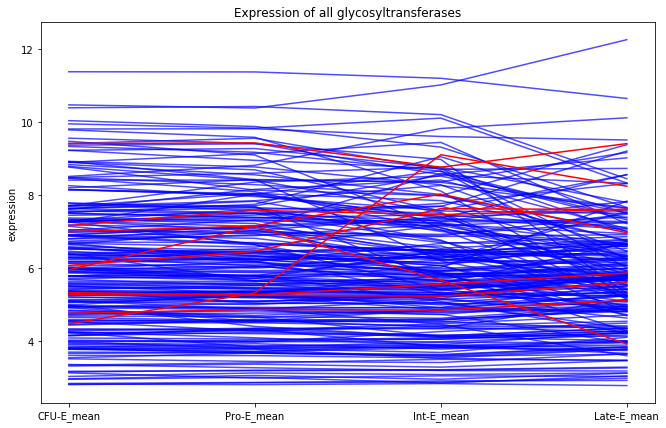

In [32]:
bg_vs_rest_plot = plot_subset_vs_rest(gt_ery_levels, bgs, mean_prefixes)